<a href="https://colab.research.google.com/github/judazag/Computacion-Visual/blob/main/2025-04-21_taller_ojos_digitales/Python/2025_04_21_taller_ojos_digitales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python numpy matplotlib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()  # Selecciona la imagen desde tu disco
# Supongamos que la imagen se llama 'imagen.jpg'
img_path = list(uploaded.keys())[0]
# Lee la imagen en formato BGR (OpenCV usa BGR por defecto)
img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)
# Verifica que se haya cargado correctamente
if img_color is None:
    raise FileNotFoundError(f"No se encontró la imagen en {img_path}")

Saving apps.47078.14062304980405346.ba8e69dc-fcd0-488e-9a4b-ca521a1bdd06.jpg to apps.47078.14062304980405346.ba8e69dc-fcd0-488e-9a4b-ca521a1bdd06 (2).jpg


In [3]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


In [4]:
blur_box = cv2.blur(img_gray, (5,5))
blur_gauss = cv2.GaussianBlur(img_gray, (5,5), sigmaX=0)


In [5]:
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5,-1],
                         [0, -1, 0]], dtype=np.float32)
sharpened = cv2.filter2D(img_gray, ddepth=-1, kernel=kernel_sharp)


In [6]:
sobelx = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
laplacian = cv2.Laplacian(img_gray, ddepth=cv2.CV_64F)


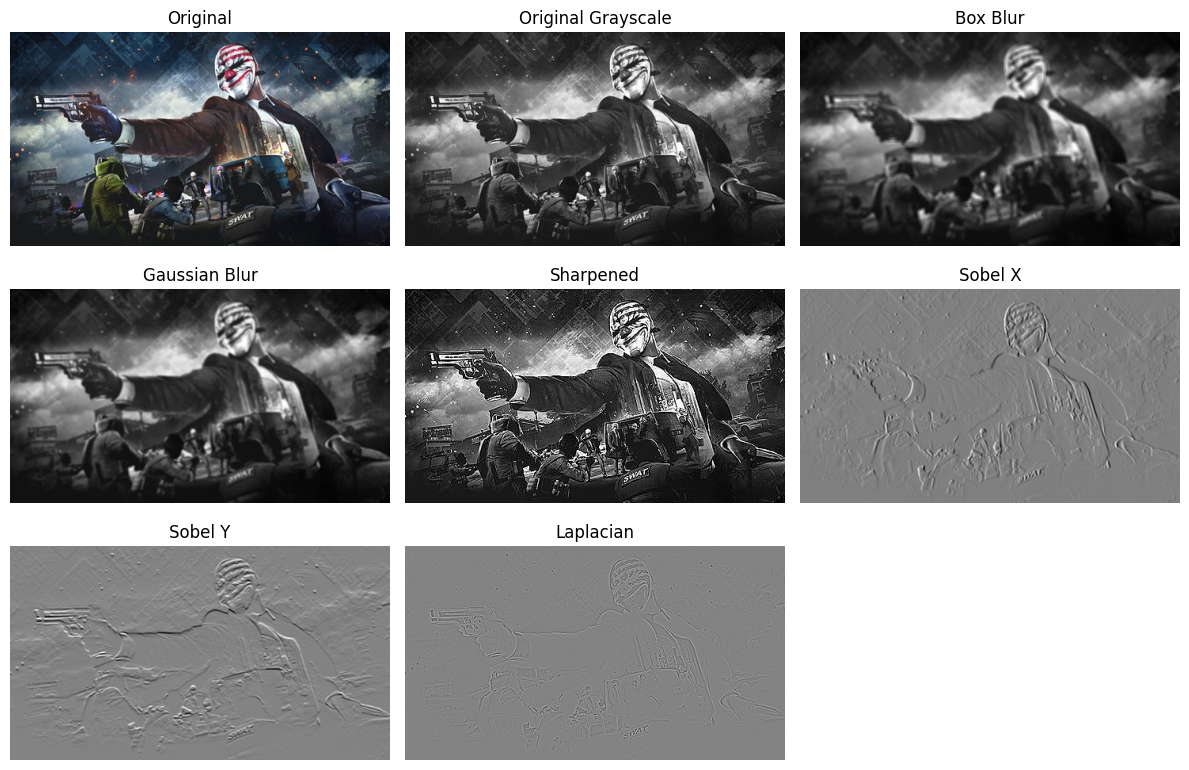

In [7]:
import matplotlib.pyplot as plt

imgs = [cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB),img_gray, blur_box, blur_gauss, sharpened,
        sobelx, sobely, laplacian]
titles = ['Original','Original Grayscale', 'Box Blur', 'Gaussian Blur', 'Sharpened',
          'Sobel X', 'Sobel Y', 'Laplacian']

plt.figure(figsize=(12,8))
for i, (im, t) in enumerate(zip(imgs, titles), 1):
    plt.subplot(3, 3, i)
    cmap = 'gray' if im.ndim==2 else None
    plt.imshow(im, cmap=cmap)
    plt.title(t)
    plt.axis('off')
plt.tight_layout()
plt.show()
